<a href="https://colab.research.google.com/github/angelatungky/github/blob/main/yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install YOLOv8 and Roboflow libraries
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.1/874.1 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:

from roboflow import Roboflow
rf = Roboflow(api_key="TqpVjCDYpvd2CQEFFbtu")
project = rf.workspace("stc-w64yv").project("vehicle-detection-kpklj")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Dependency ultralytics==8.0.196 is required but found version=8.2.101, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Vehicle-Detection-1 in yolov8:: 100%|██████████| 2036/2036 [00:00<00:00, 3242.70it/s]


In [3]:
!nvidia-smi

Thu Sep 26 05:56:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
!yolo task=detect mode=train model=yolov8s.pt data="/content/Vehicle-Detection-1/data.yaml" epochs=100 imgsz=640 batch=8 amp=True

Ultralytics YOLOv8.2.101 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Vehicle-Detection-1/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

In [8]:
!ls runs/detect/train2/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1727330292.af8652811a05.1594.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch8010.jpg  weights
P_curve.png					    train_batch8011.jpg
PR_curve.png					    train_batch8012.jpg


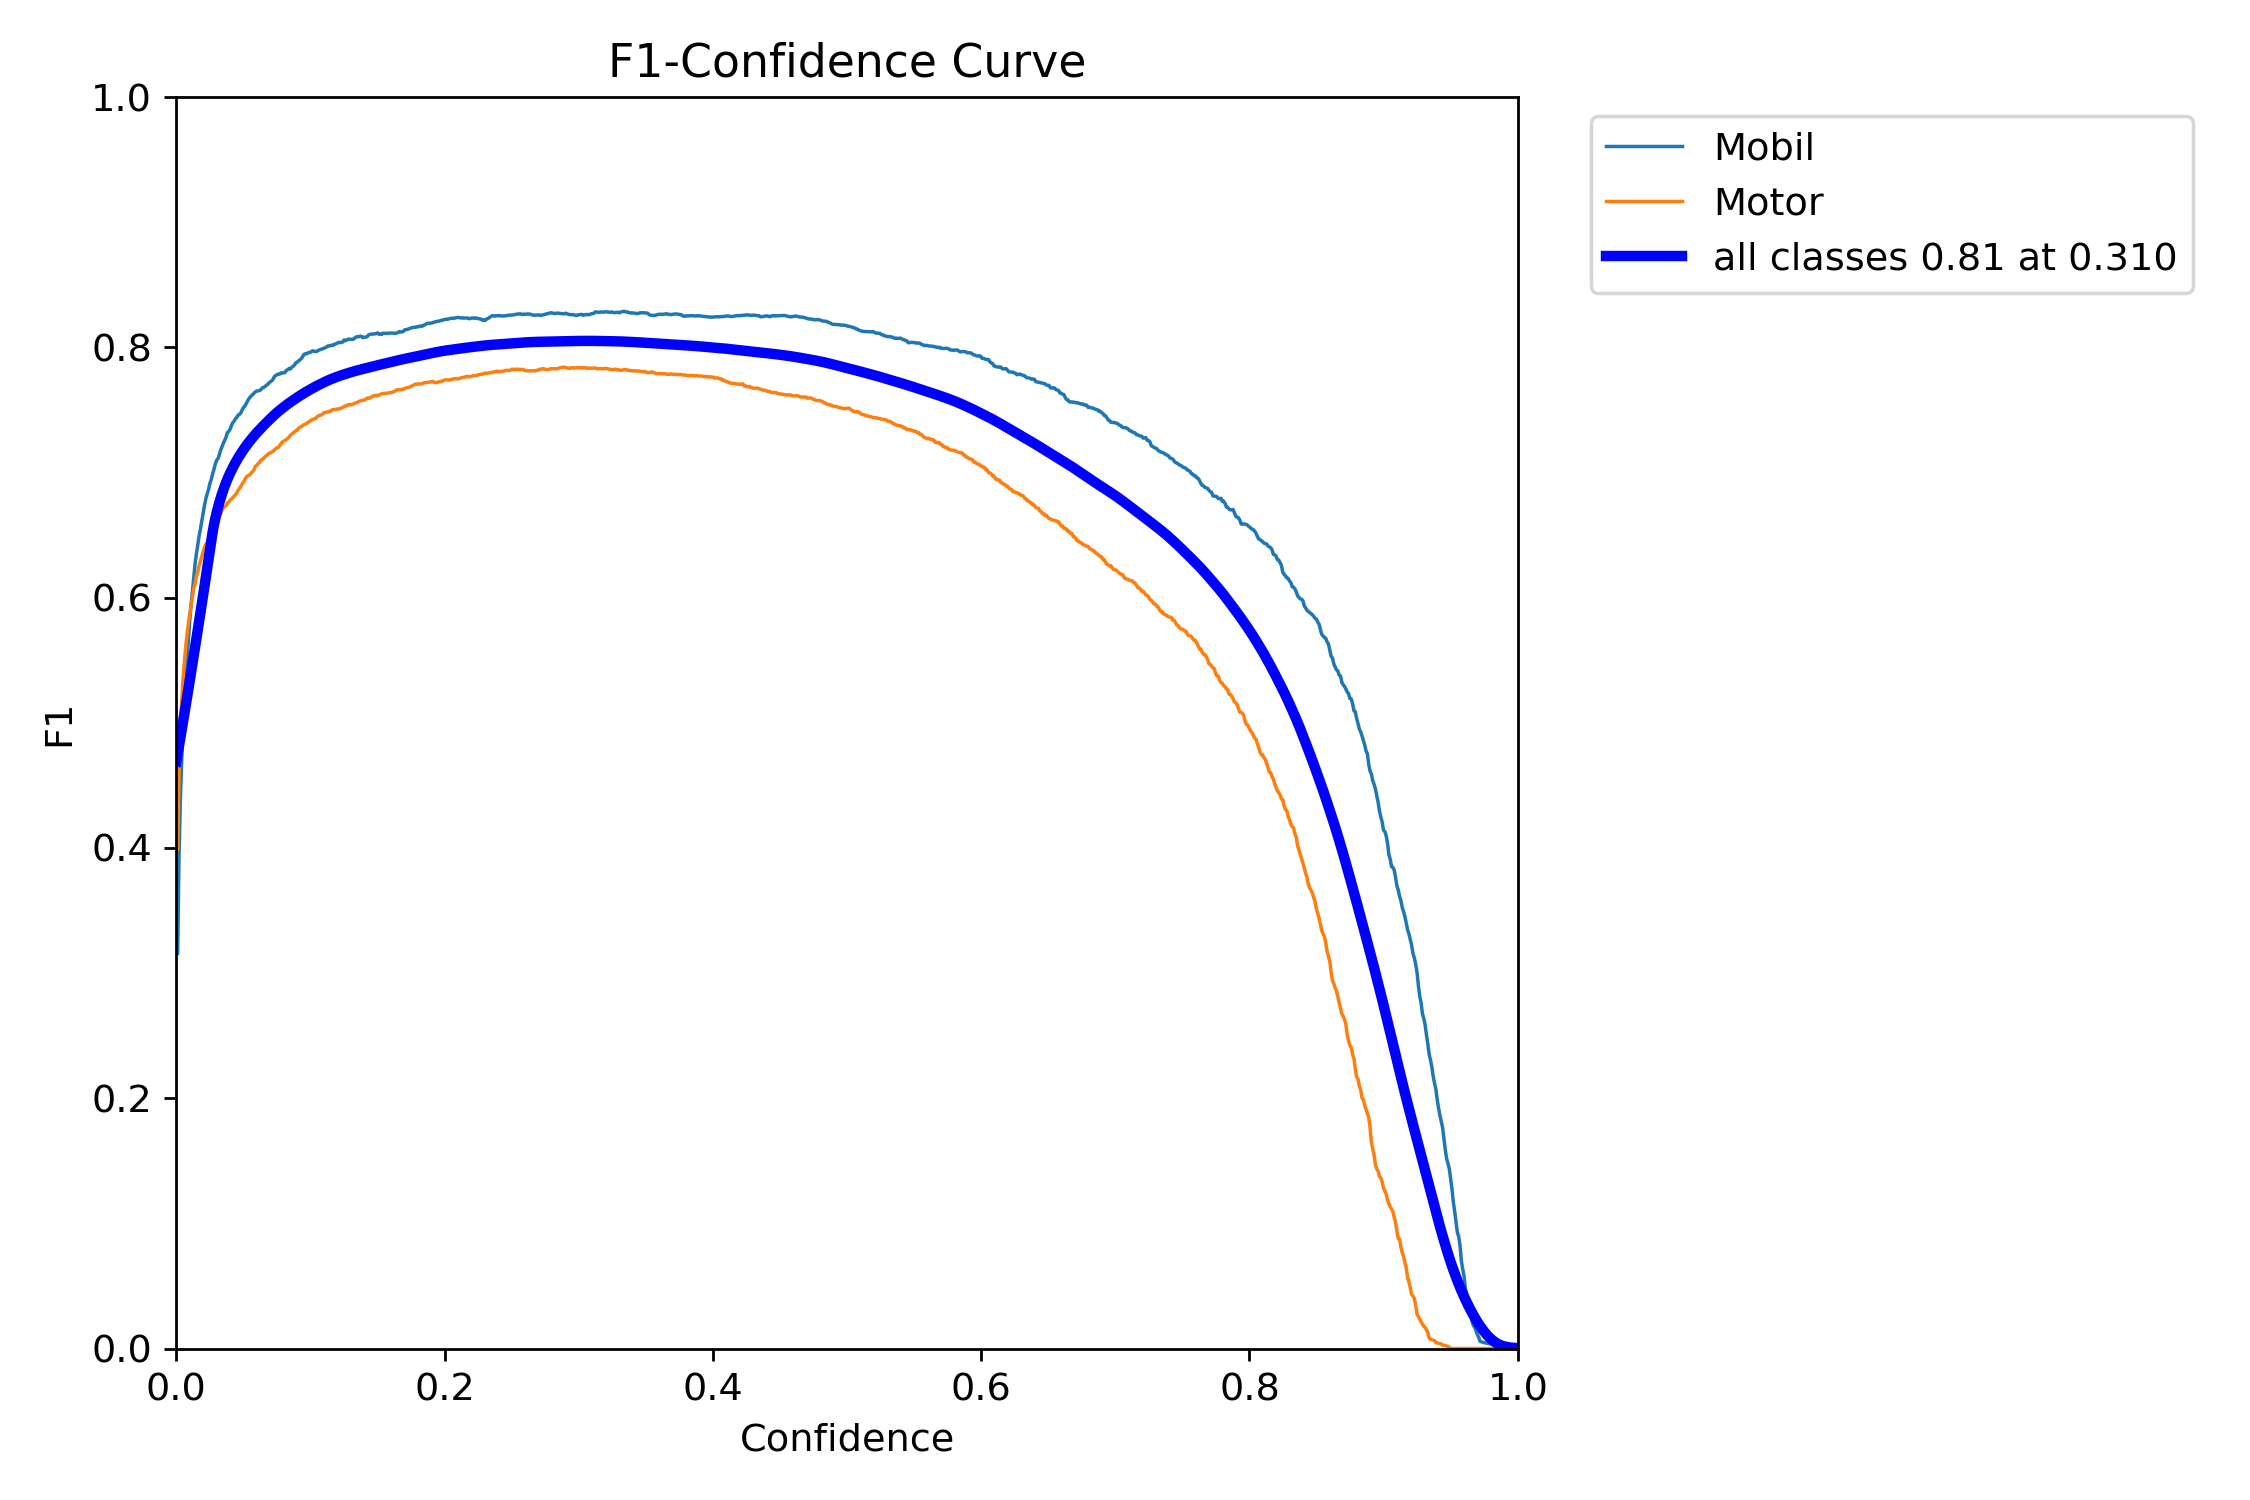

In [15]:
from IPython.display import Image, display

# Display confusion matrix
display(Image(filename='/content/runs/detect/train2/F1_curve.png'))

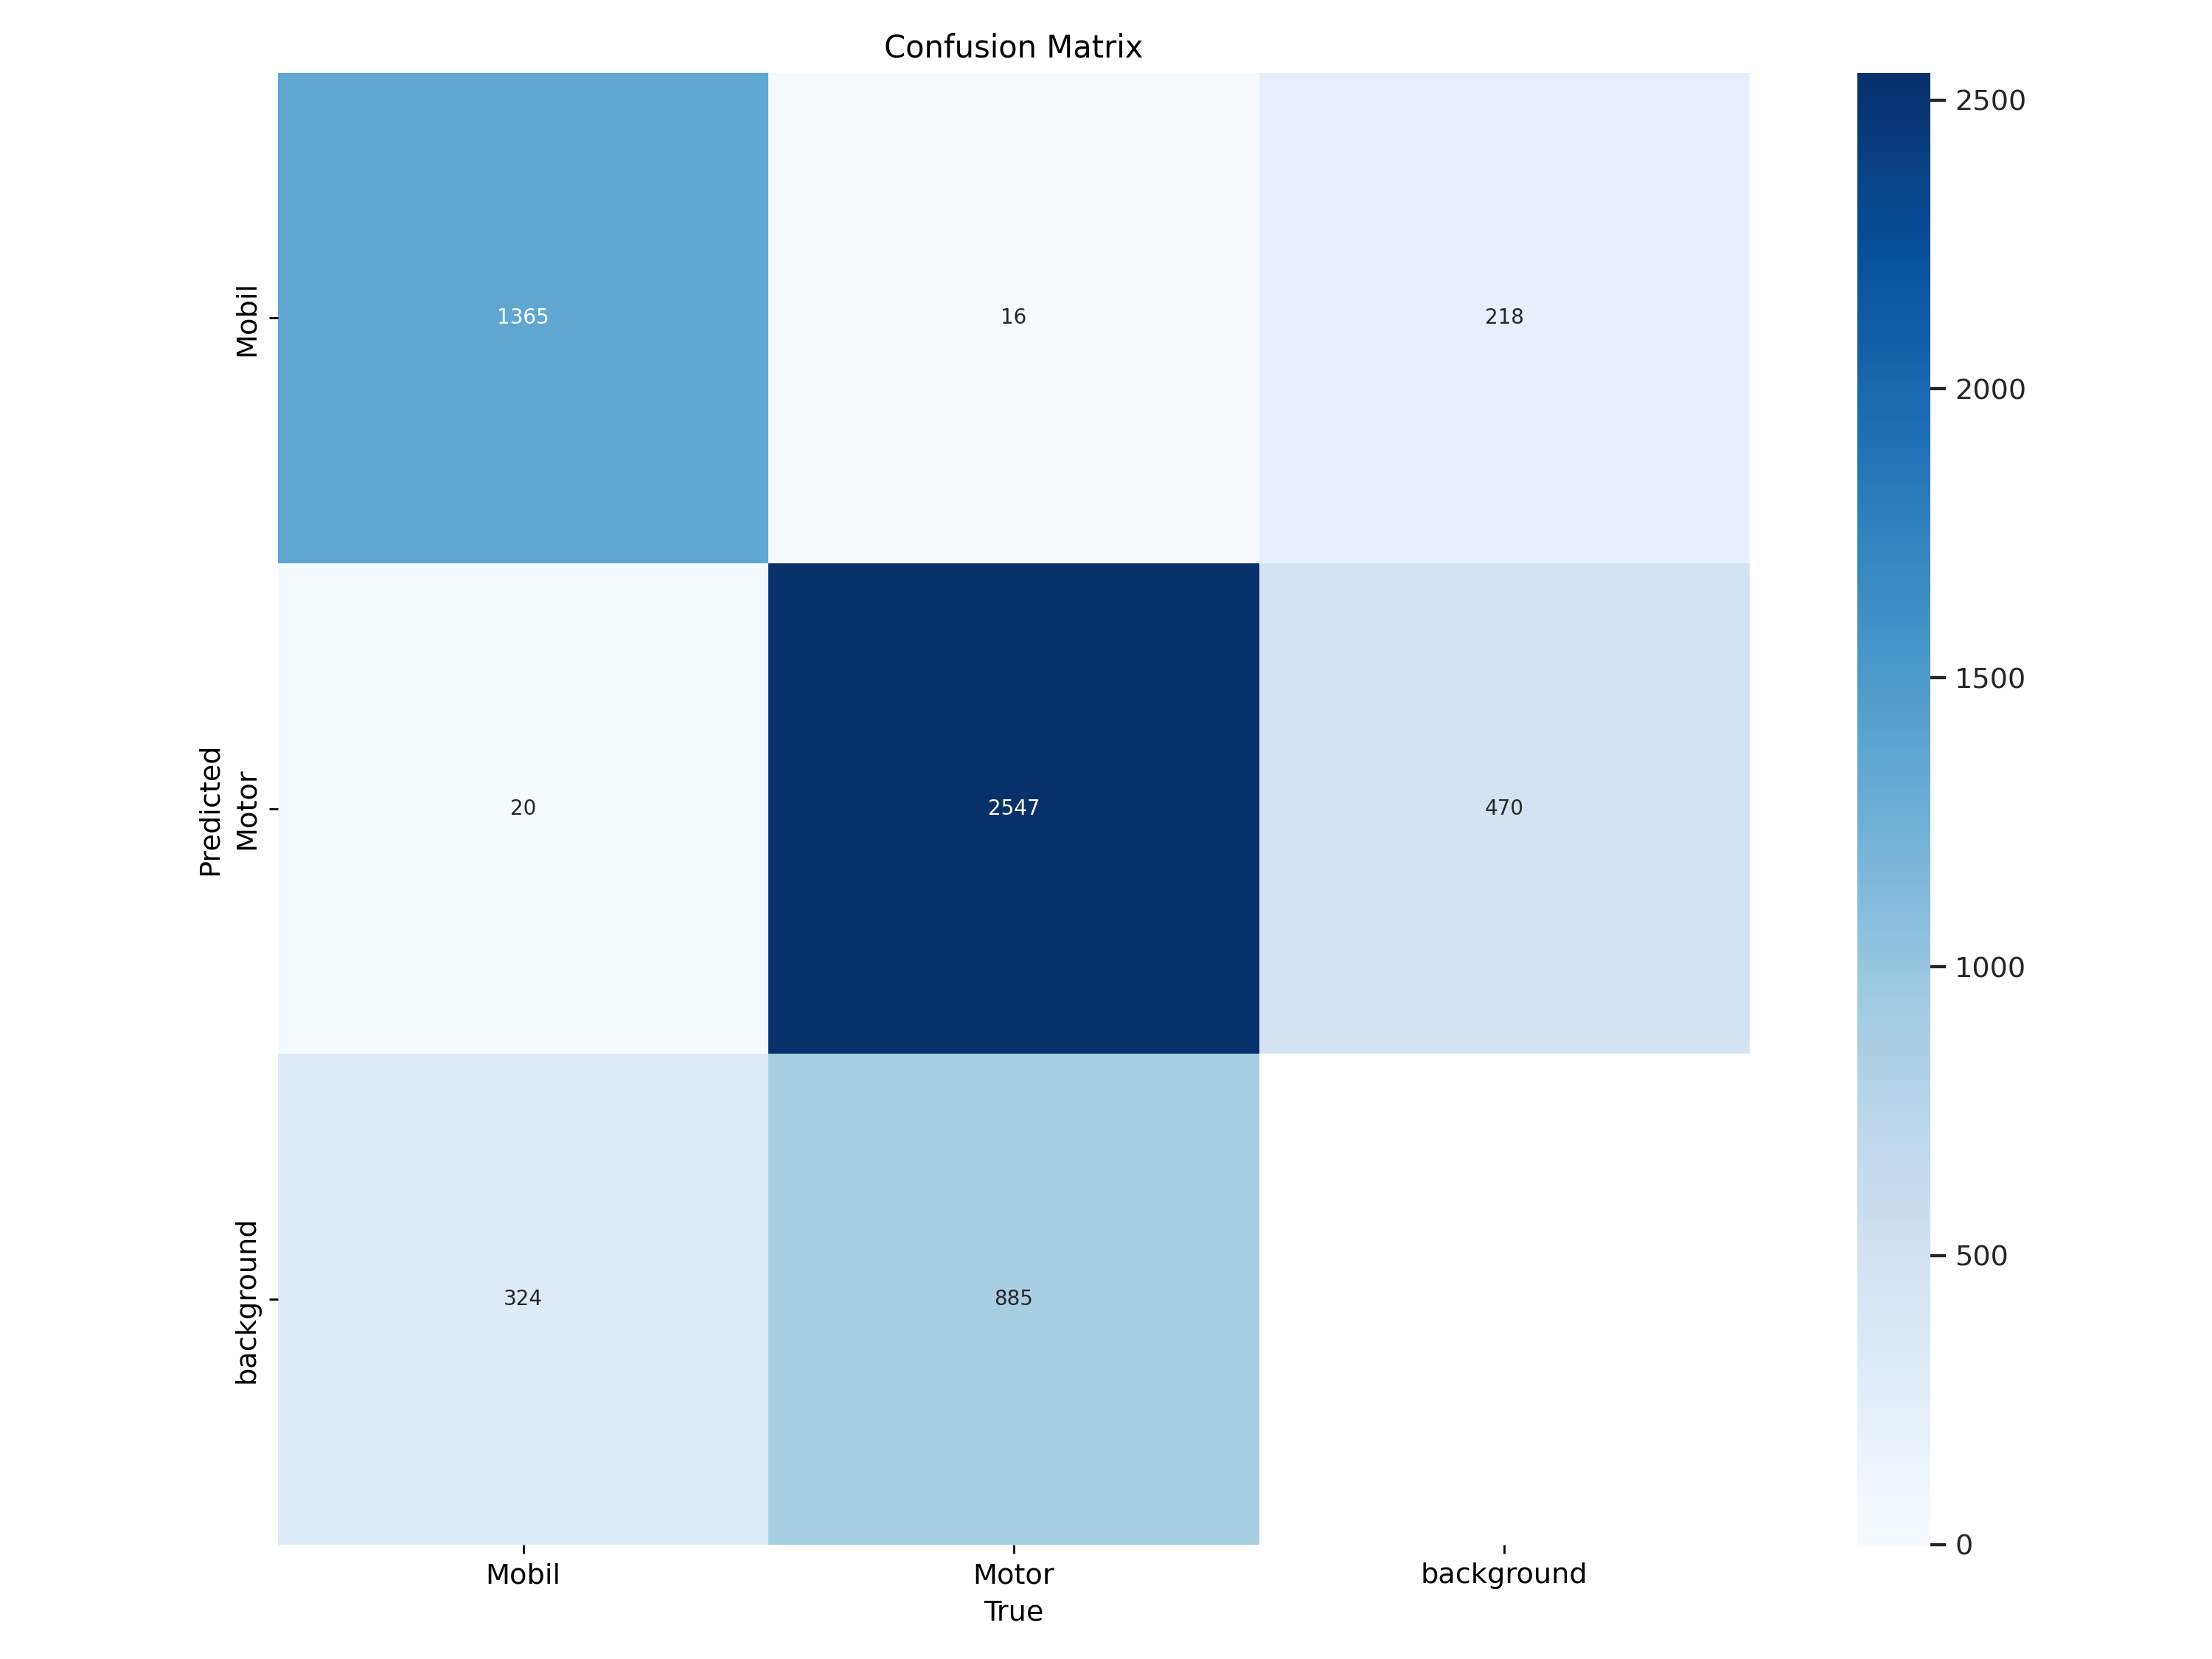

In [13]:
from IPython.display import Image, display

# Display confusion matrix
display(Image(filename='/content/runs/detect/train2/confusion_matrix.png'))

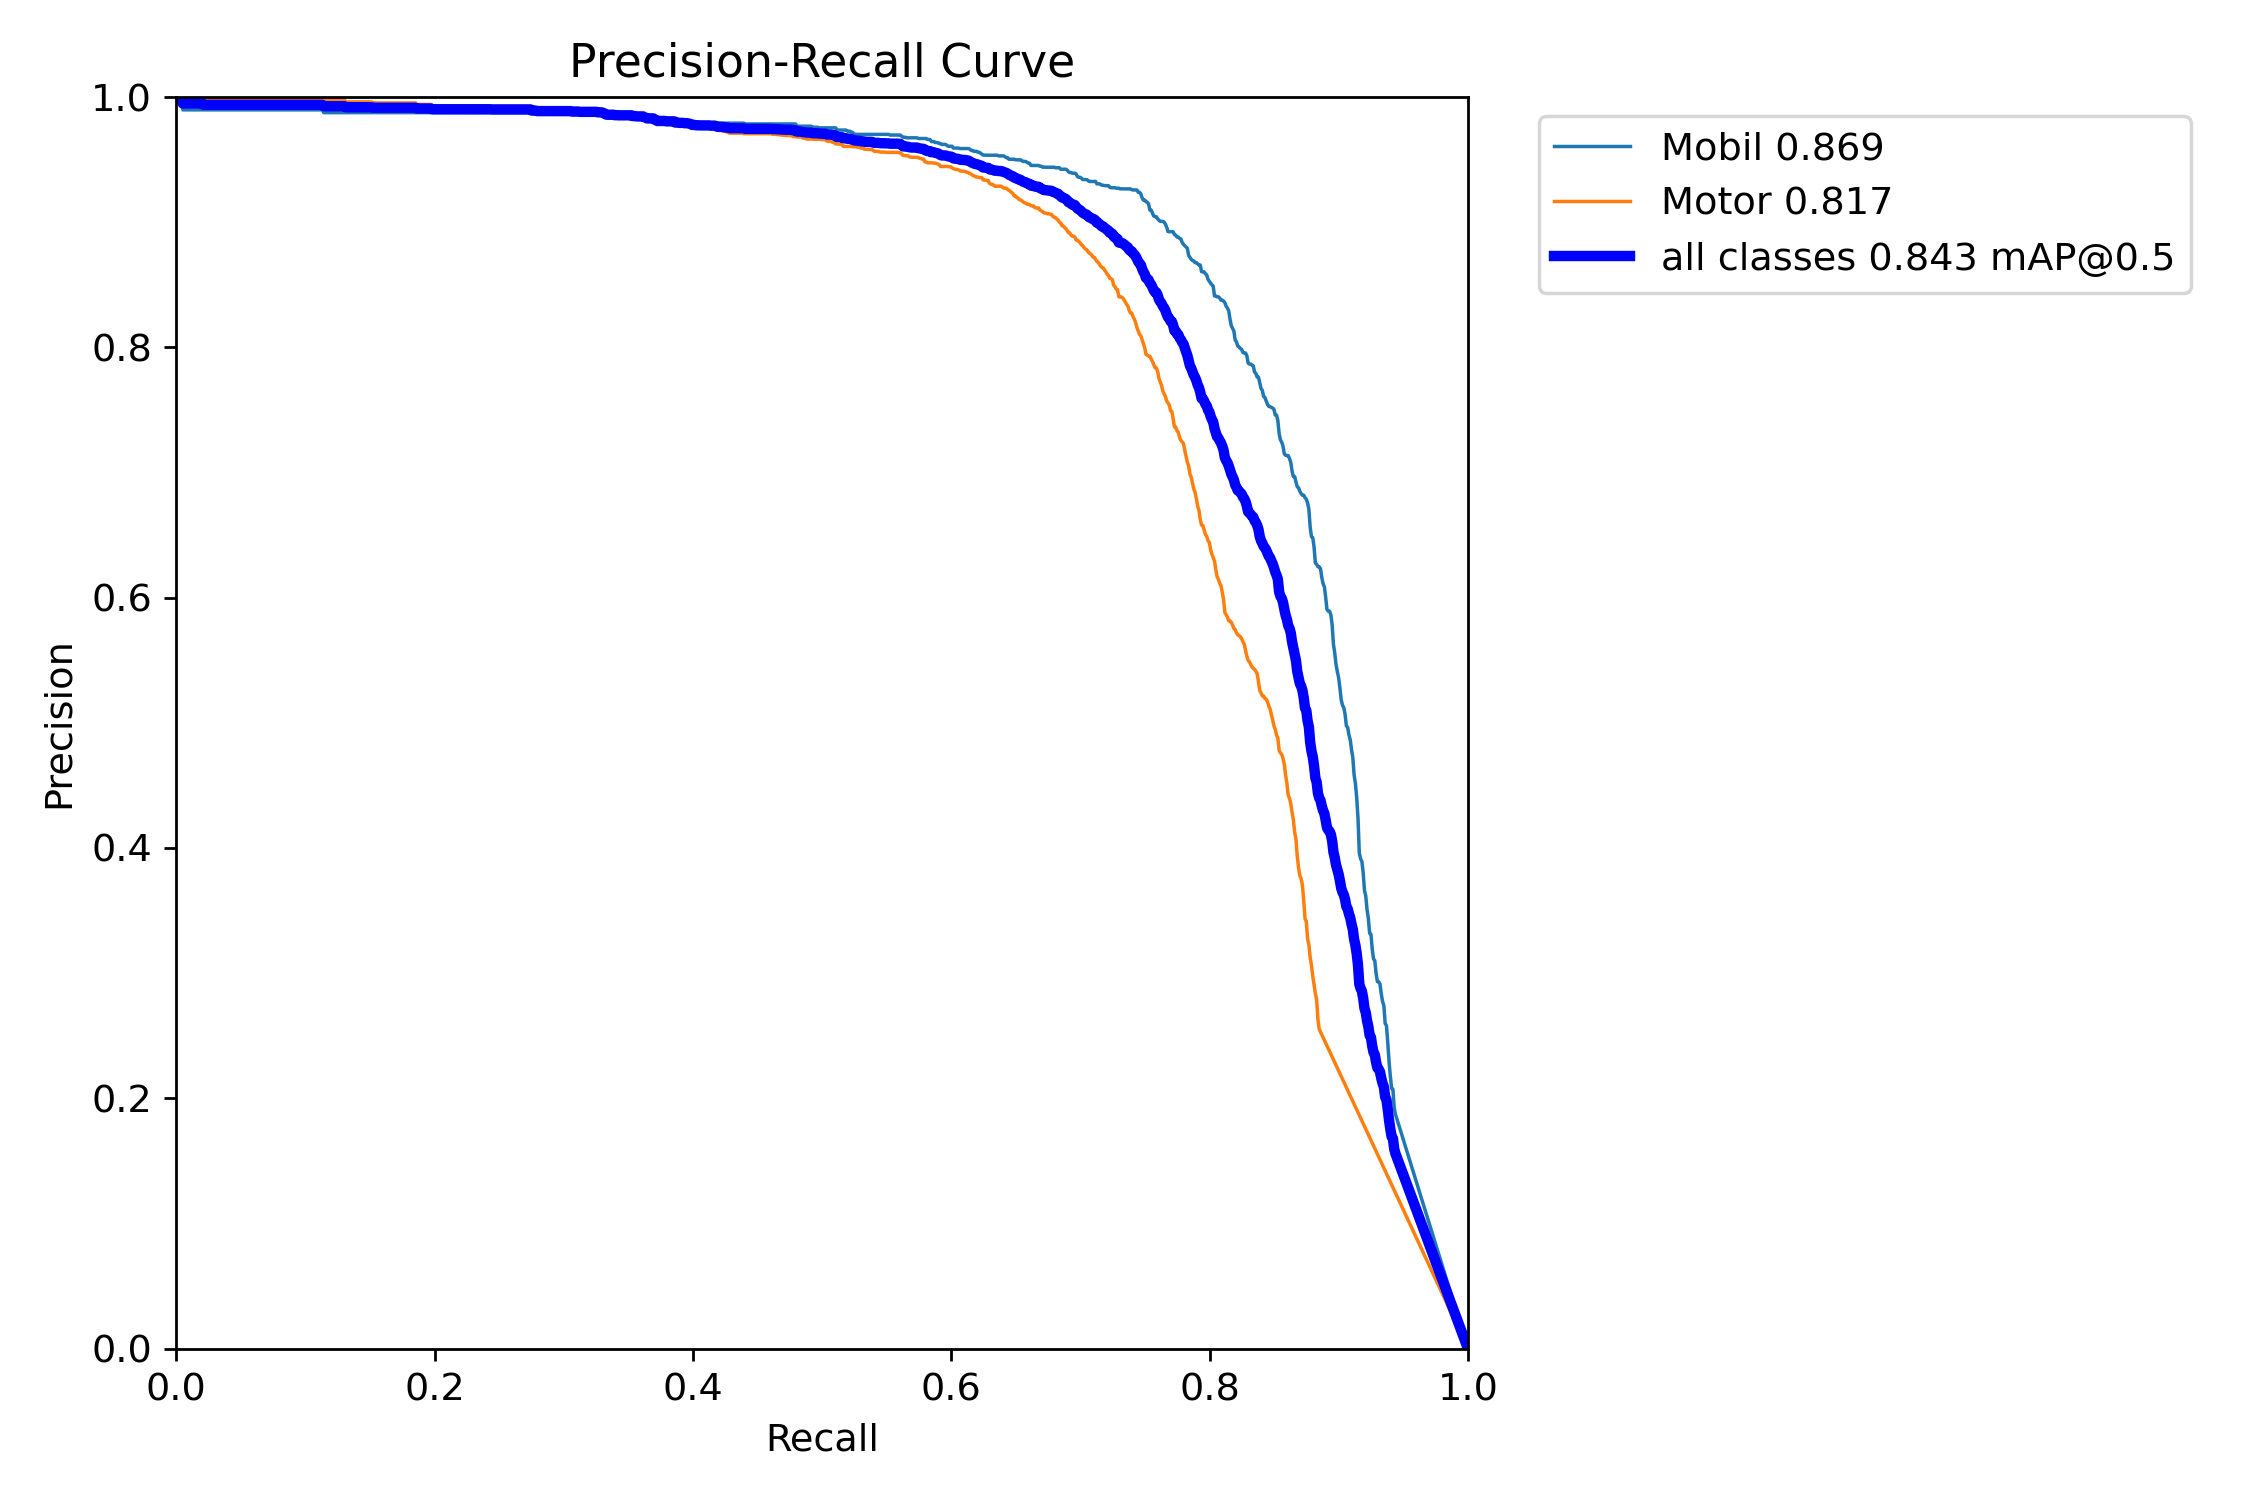

In [16]:
from IPython.display import Image, display

# Display confusion matrix
display(Image(filename='/content/runs/detect/train2/PR_curve.png'))


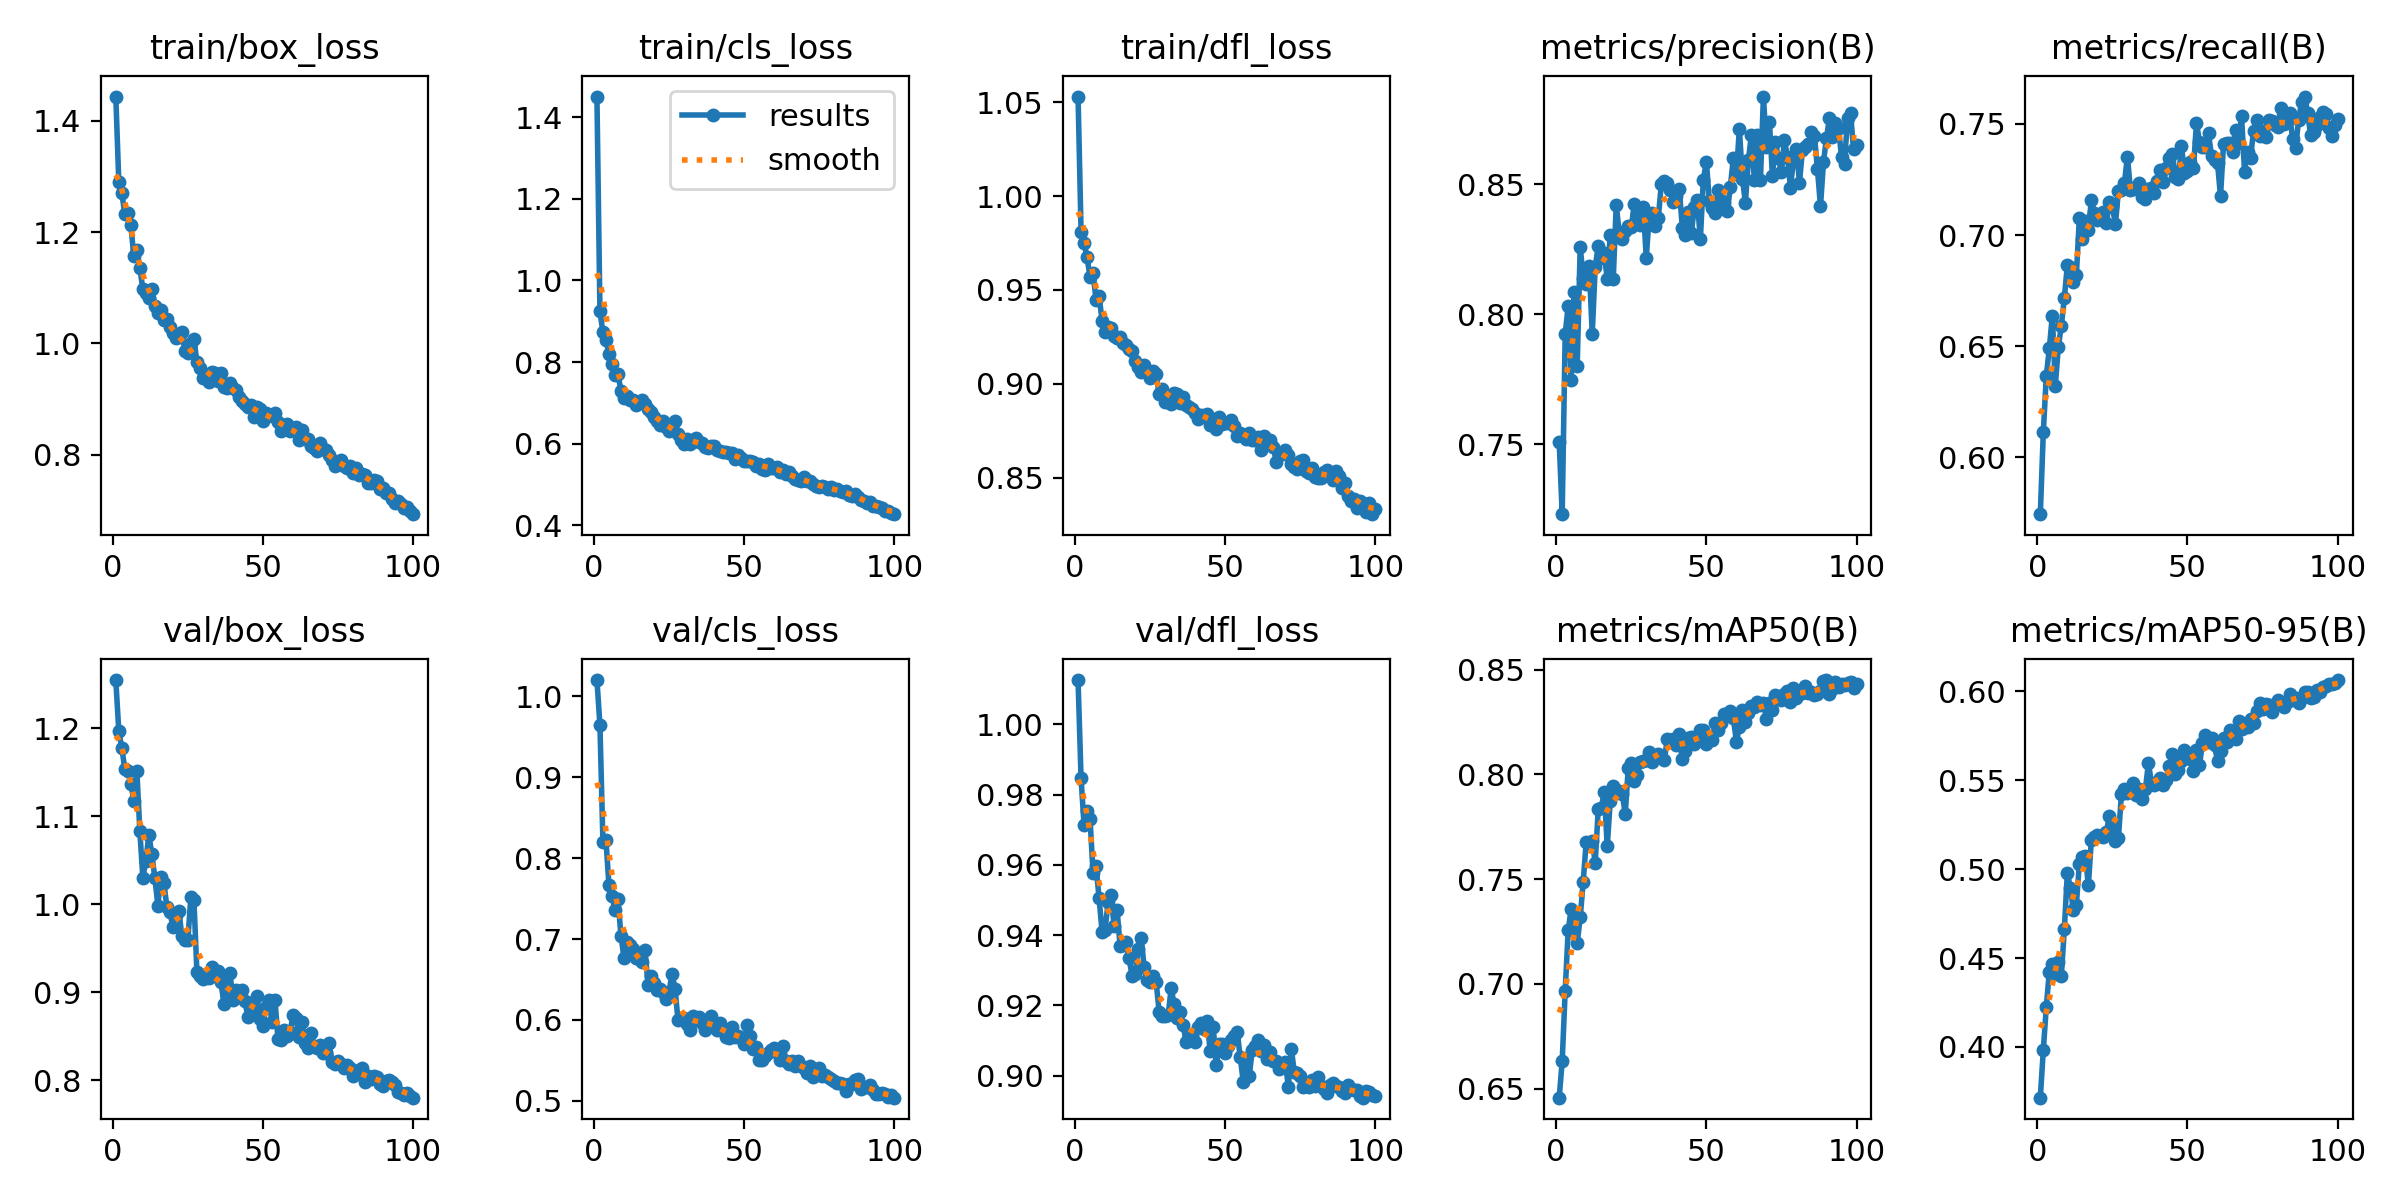

In [17]:
display(Image(filename='/content/runs/detect/train2/results.png'))



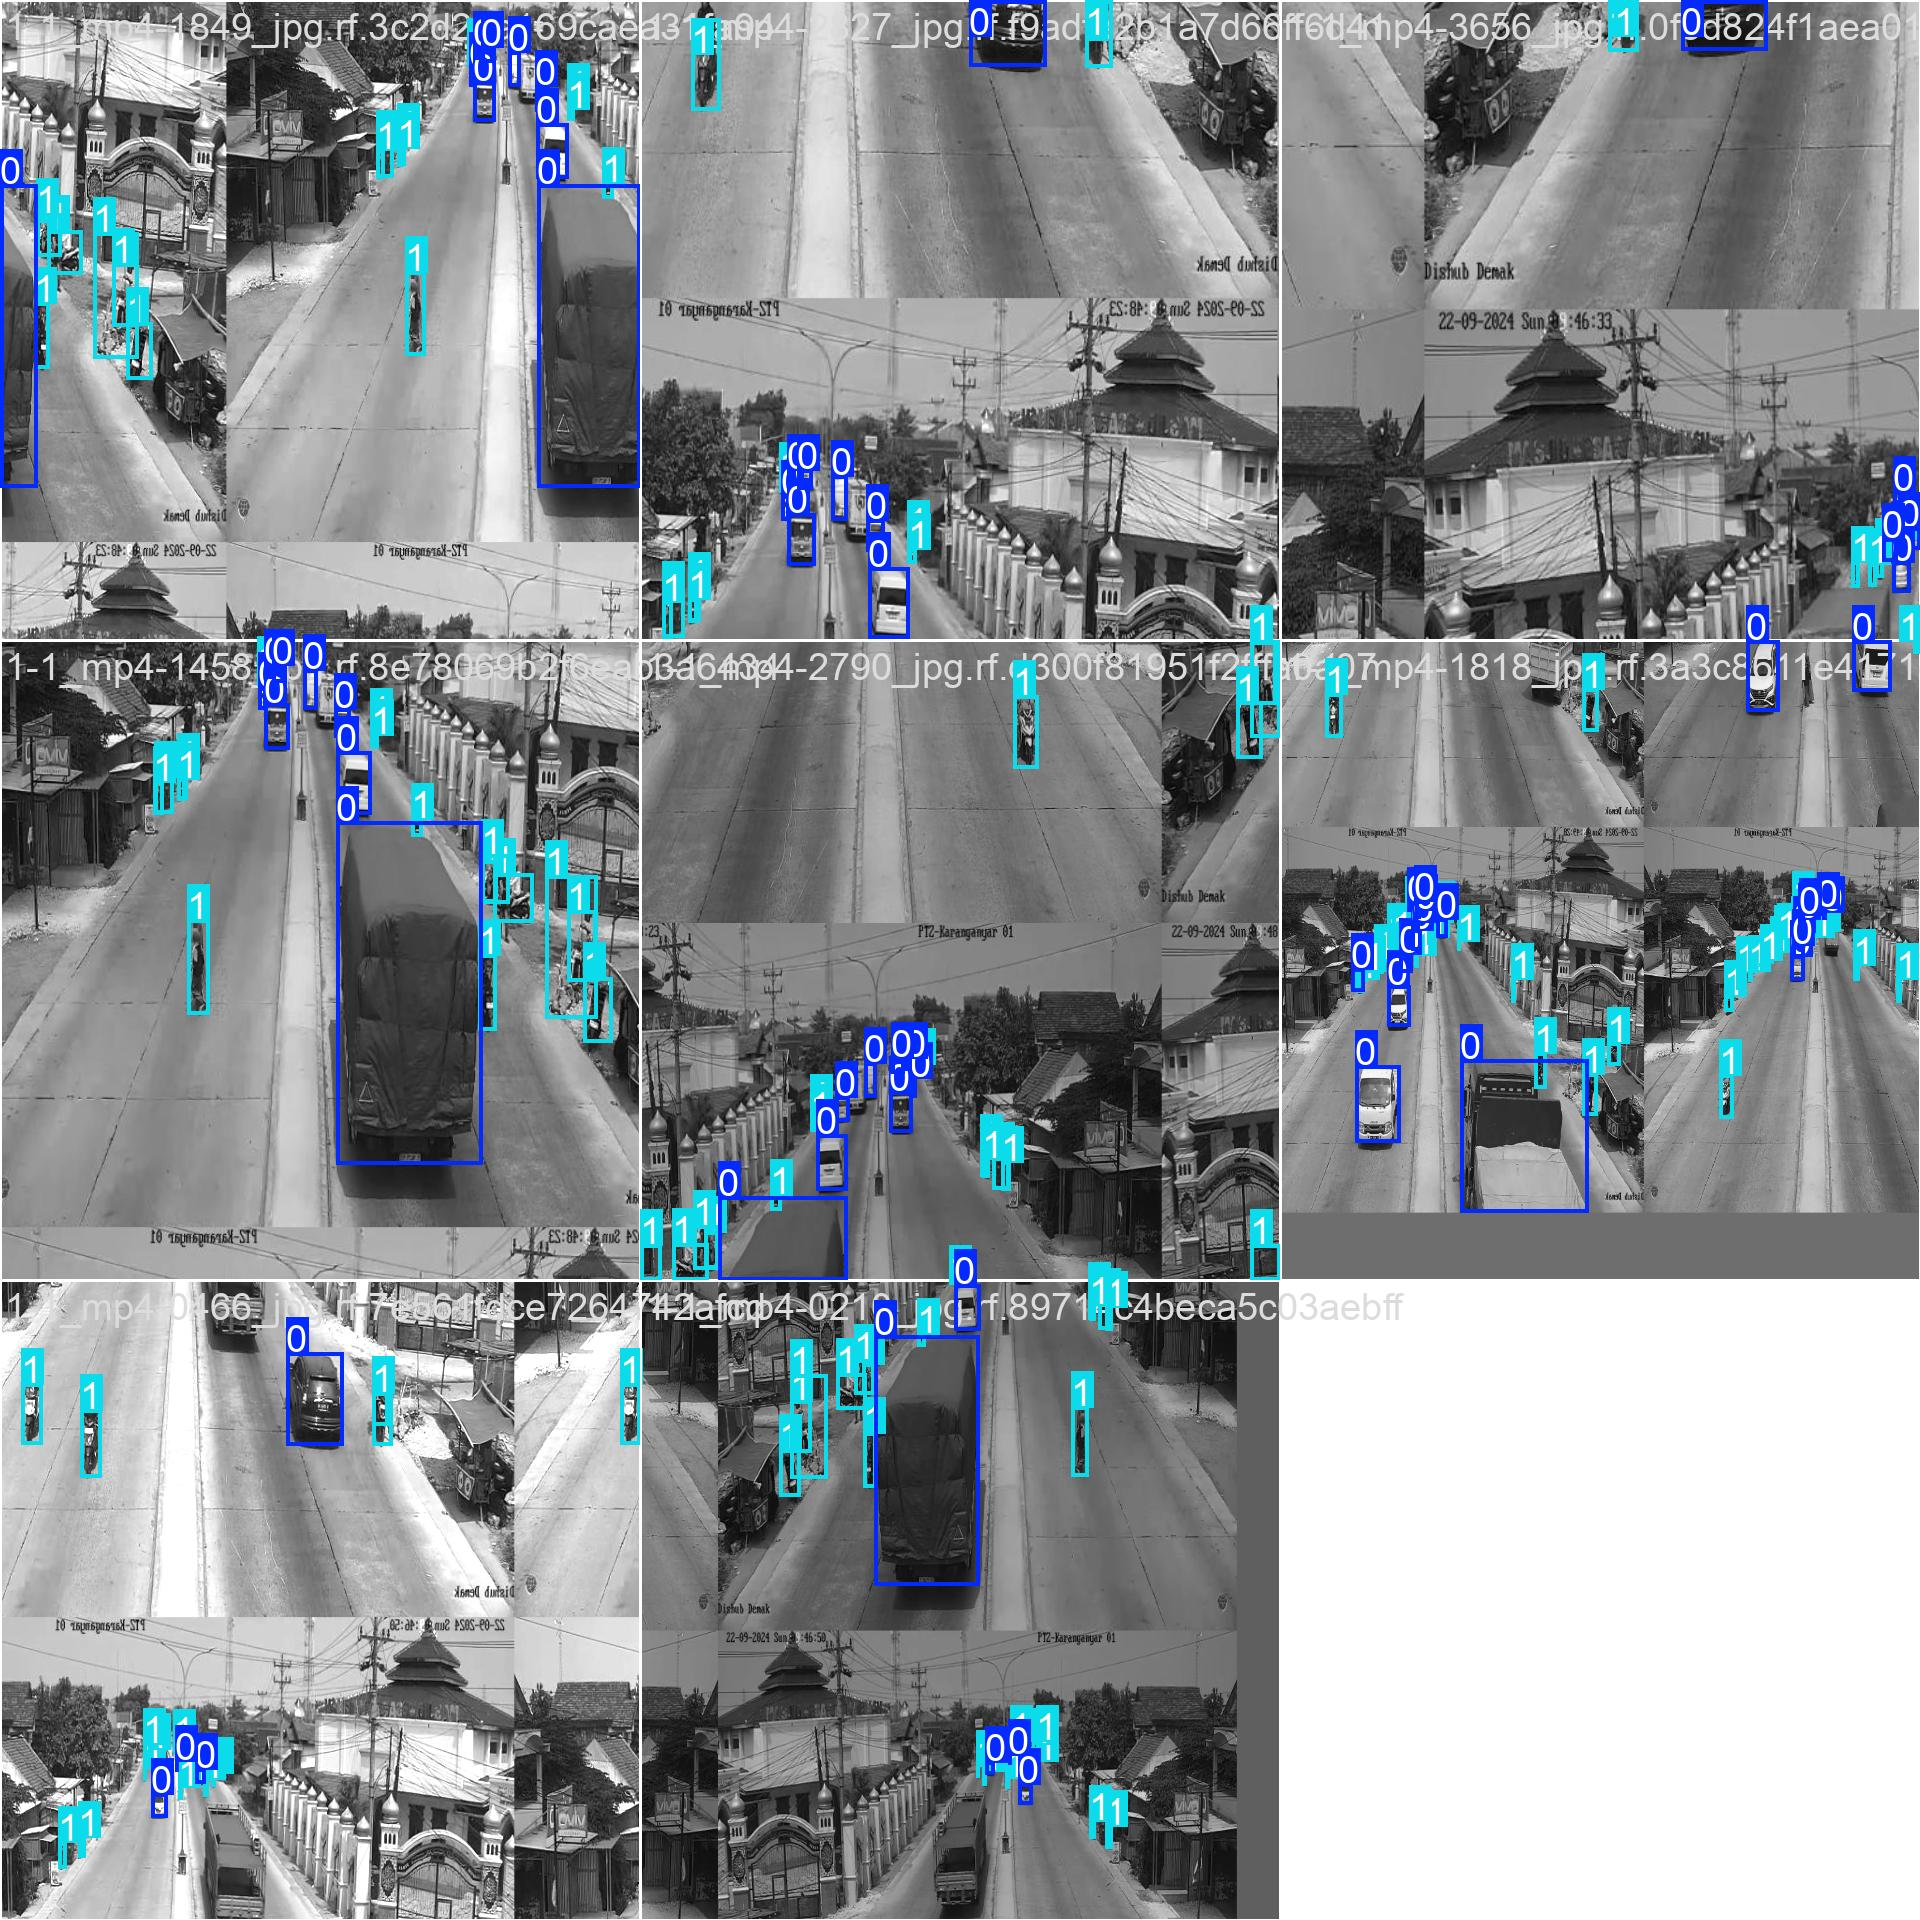

In [18]:
display(Image(filename='/content/runs/detect/train2/train_batch1.jpg'))



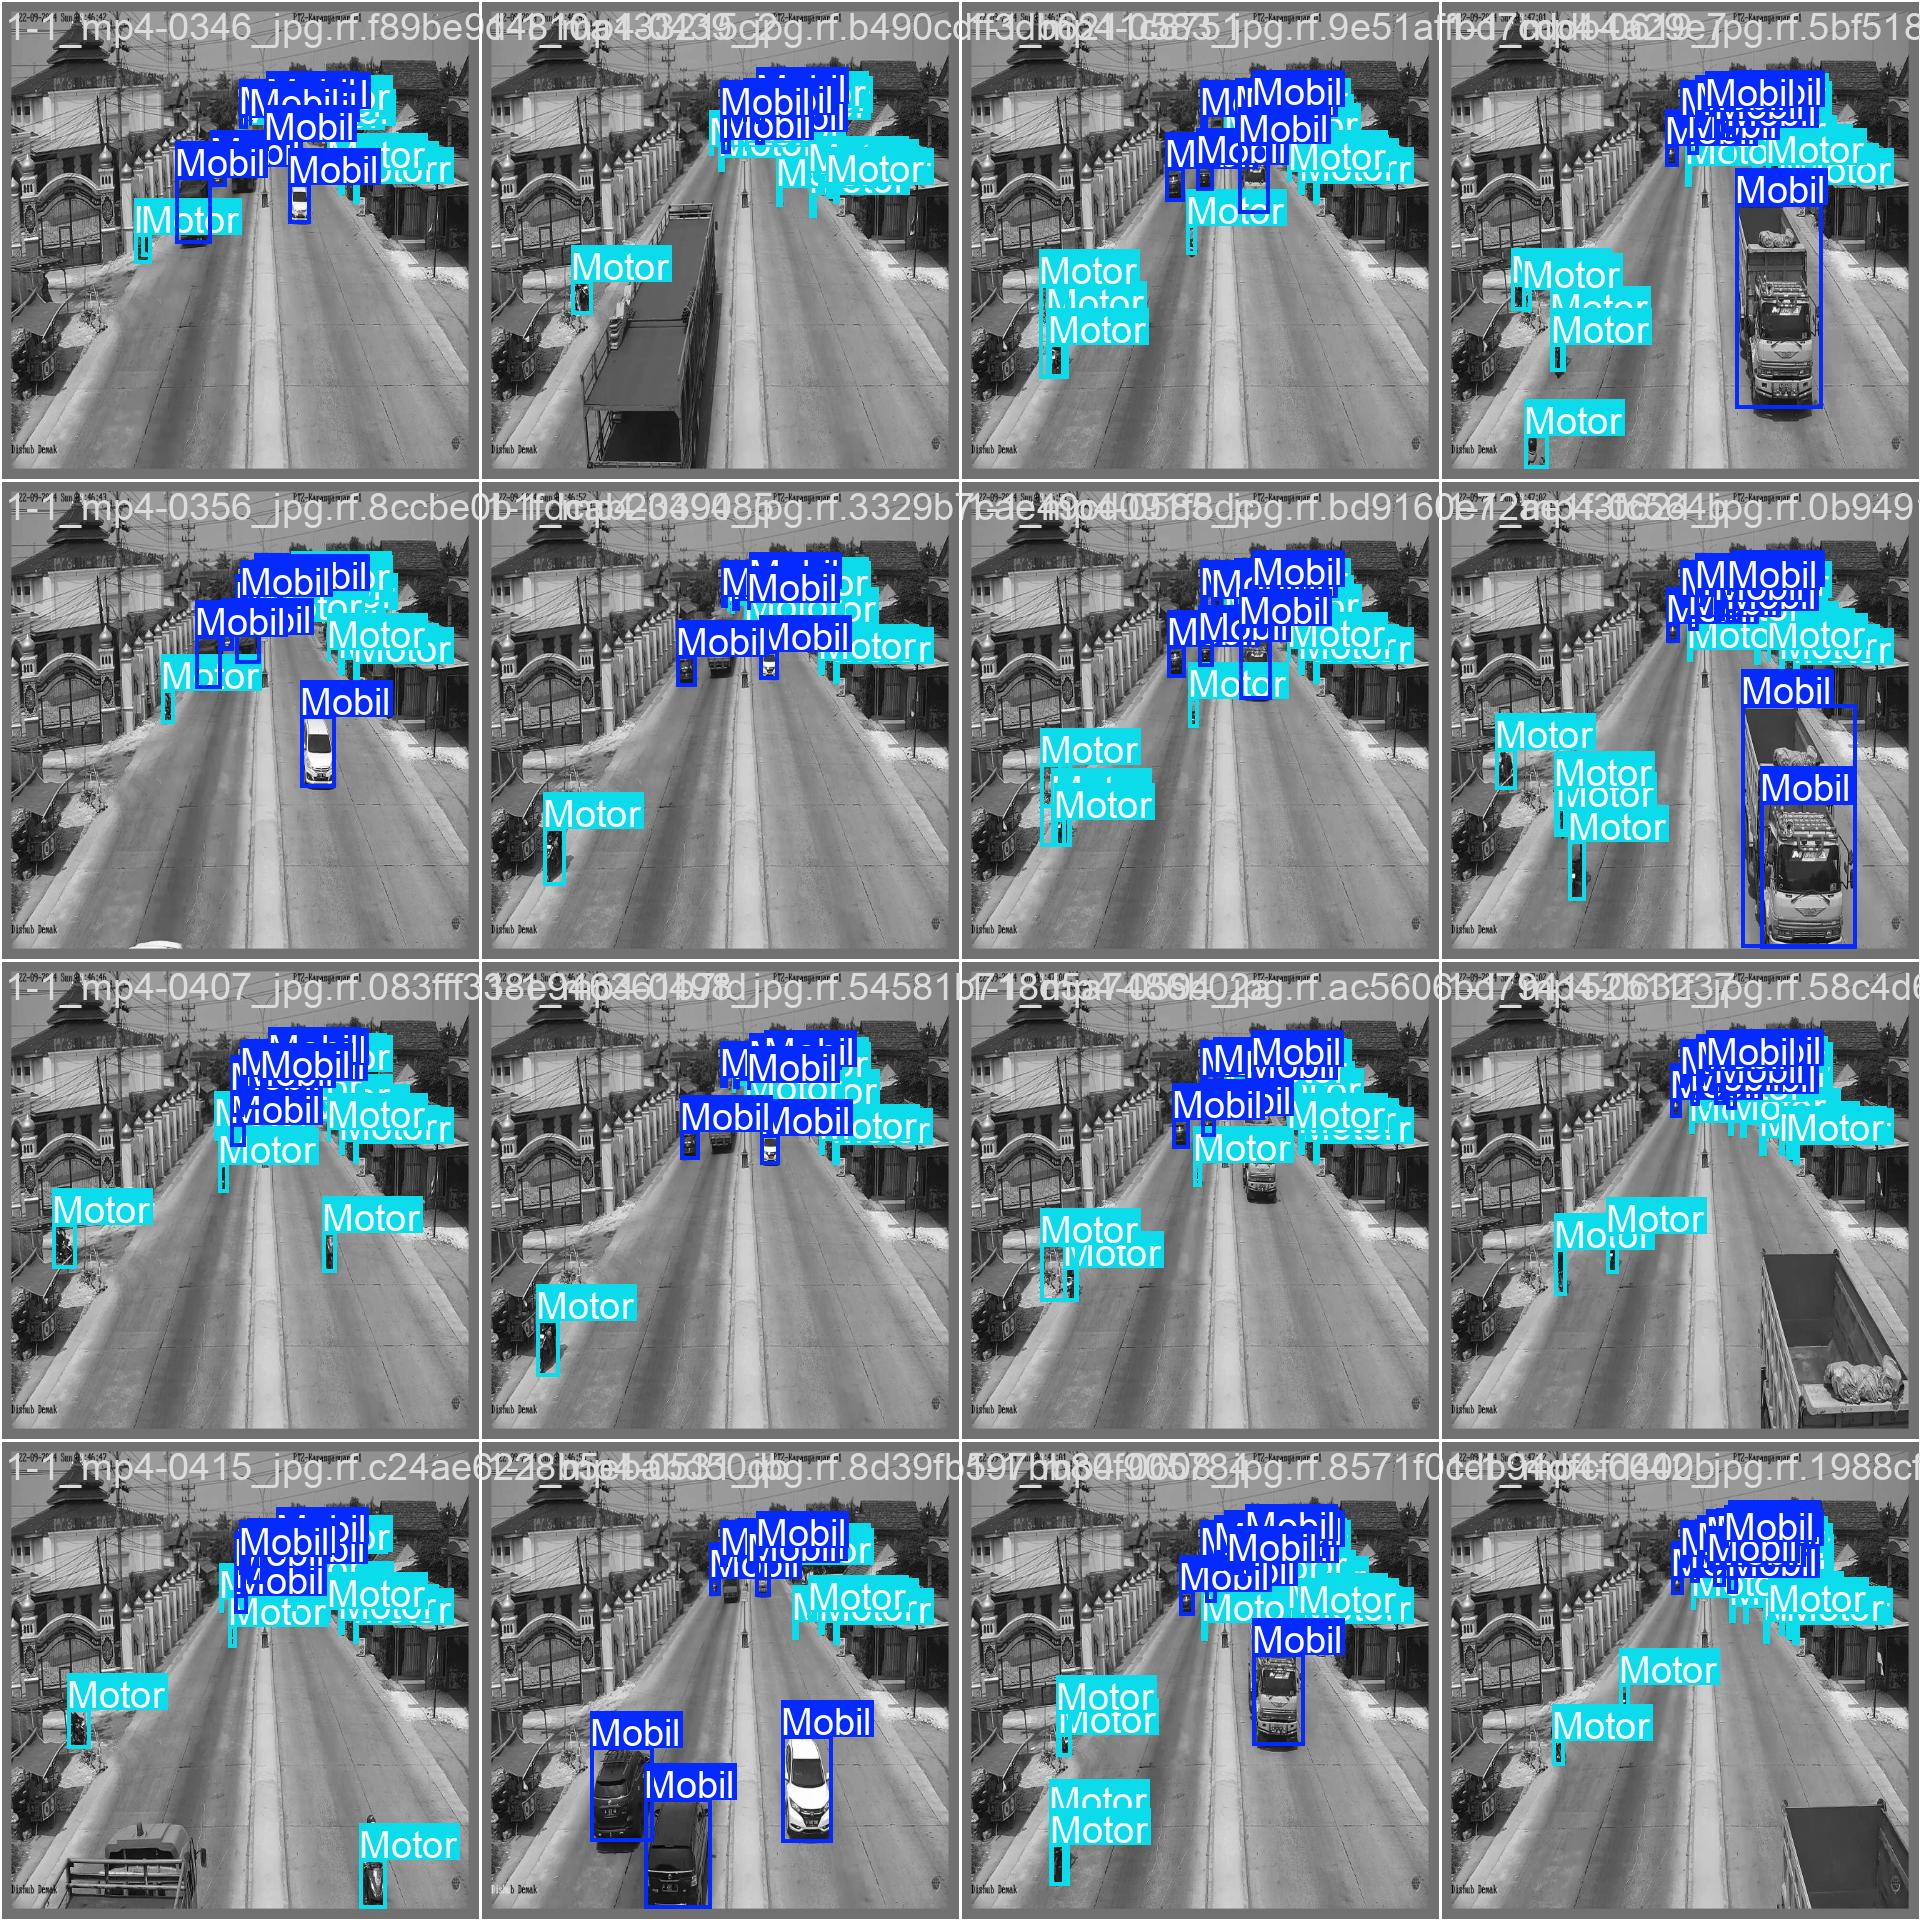

In [19]:
display(Image(filename='/content/runs/detect/train2/val_batch1_labels.jpg'))

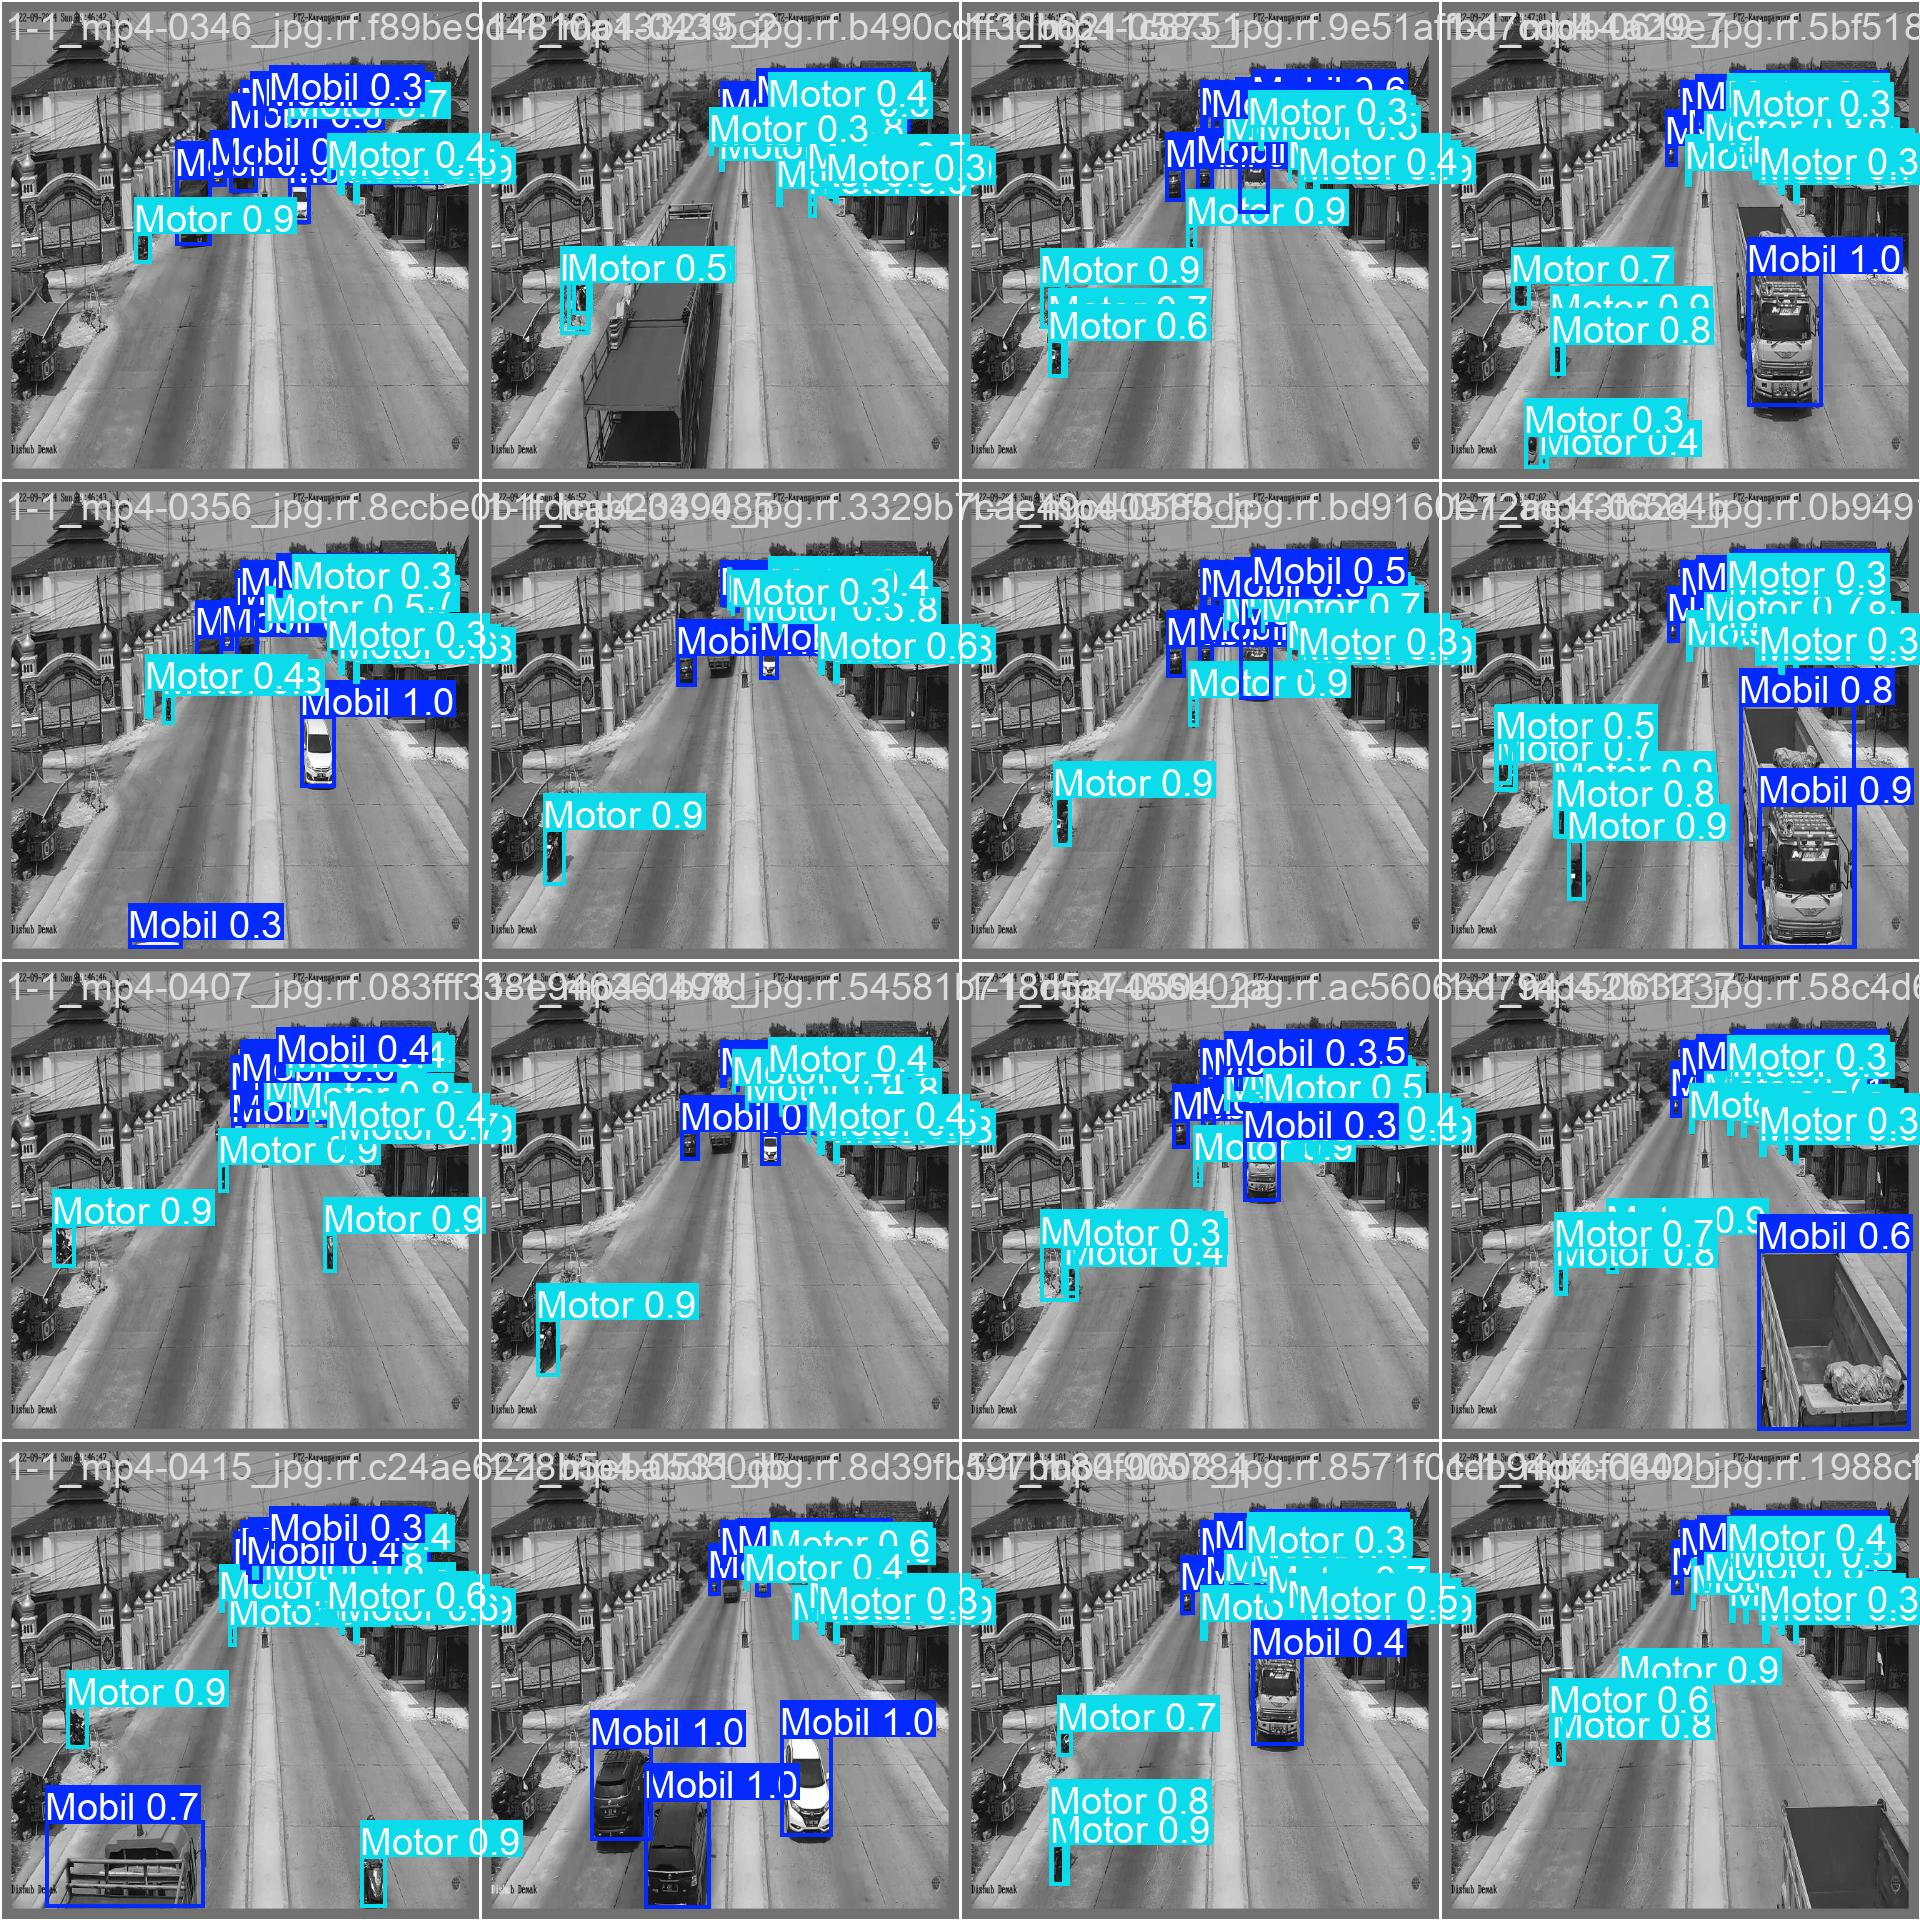

In [20]:
display(Image(filename='/content/runs/detect/train2/val_batch1_pred.jpg'))

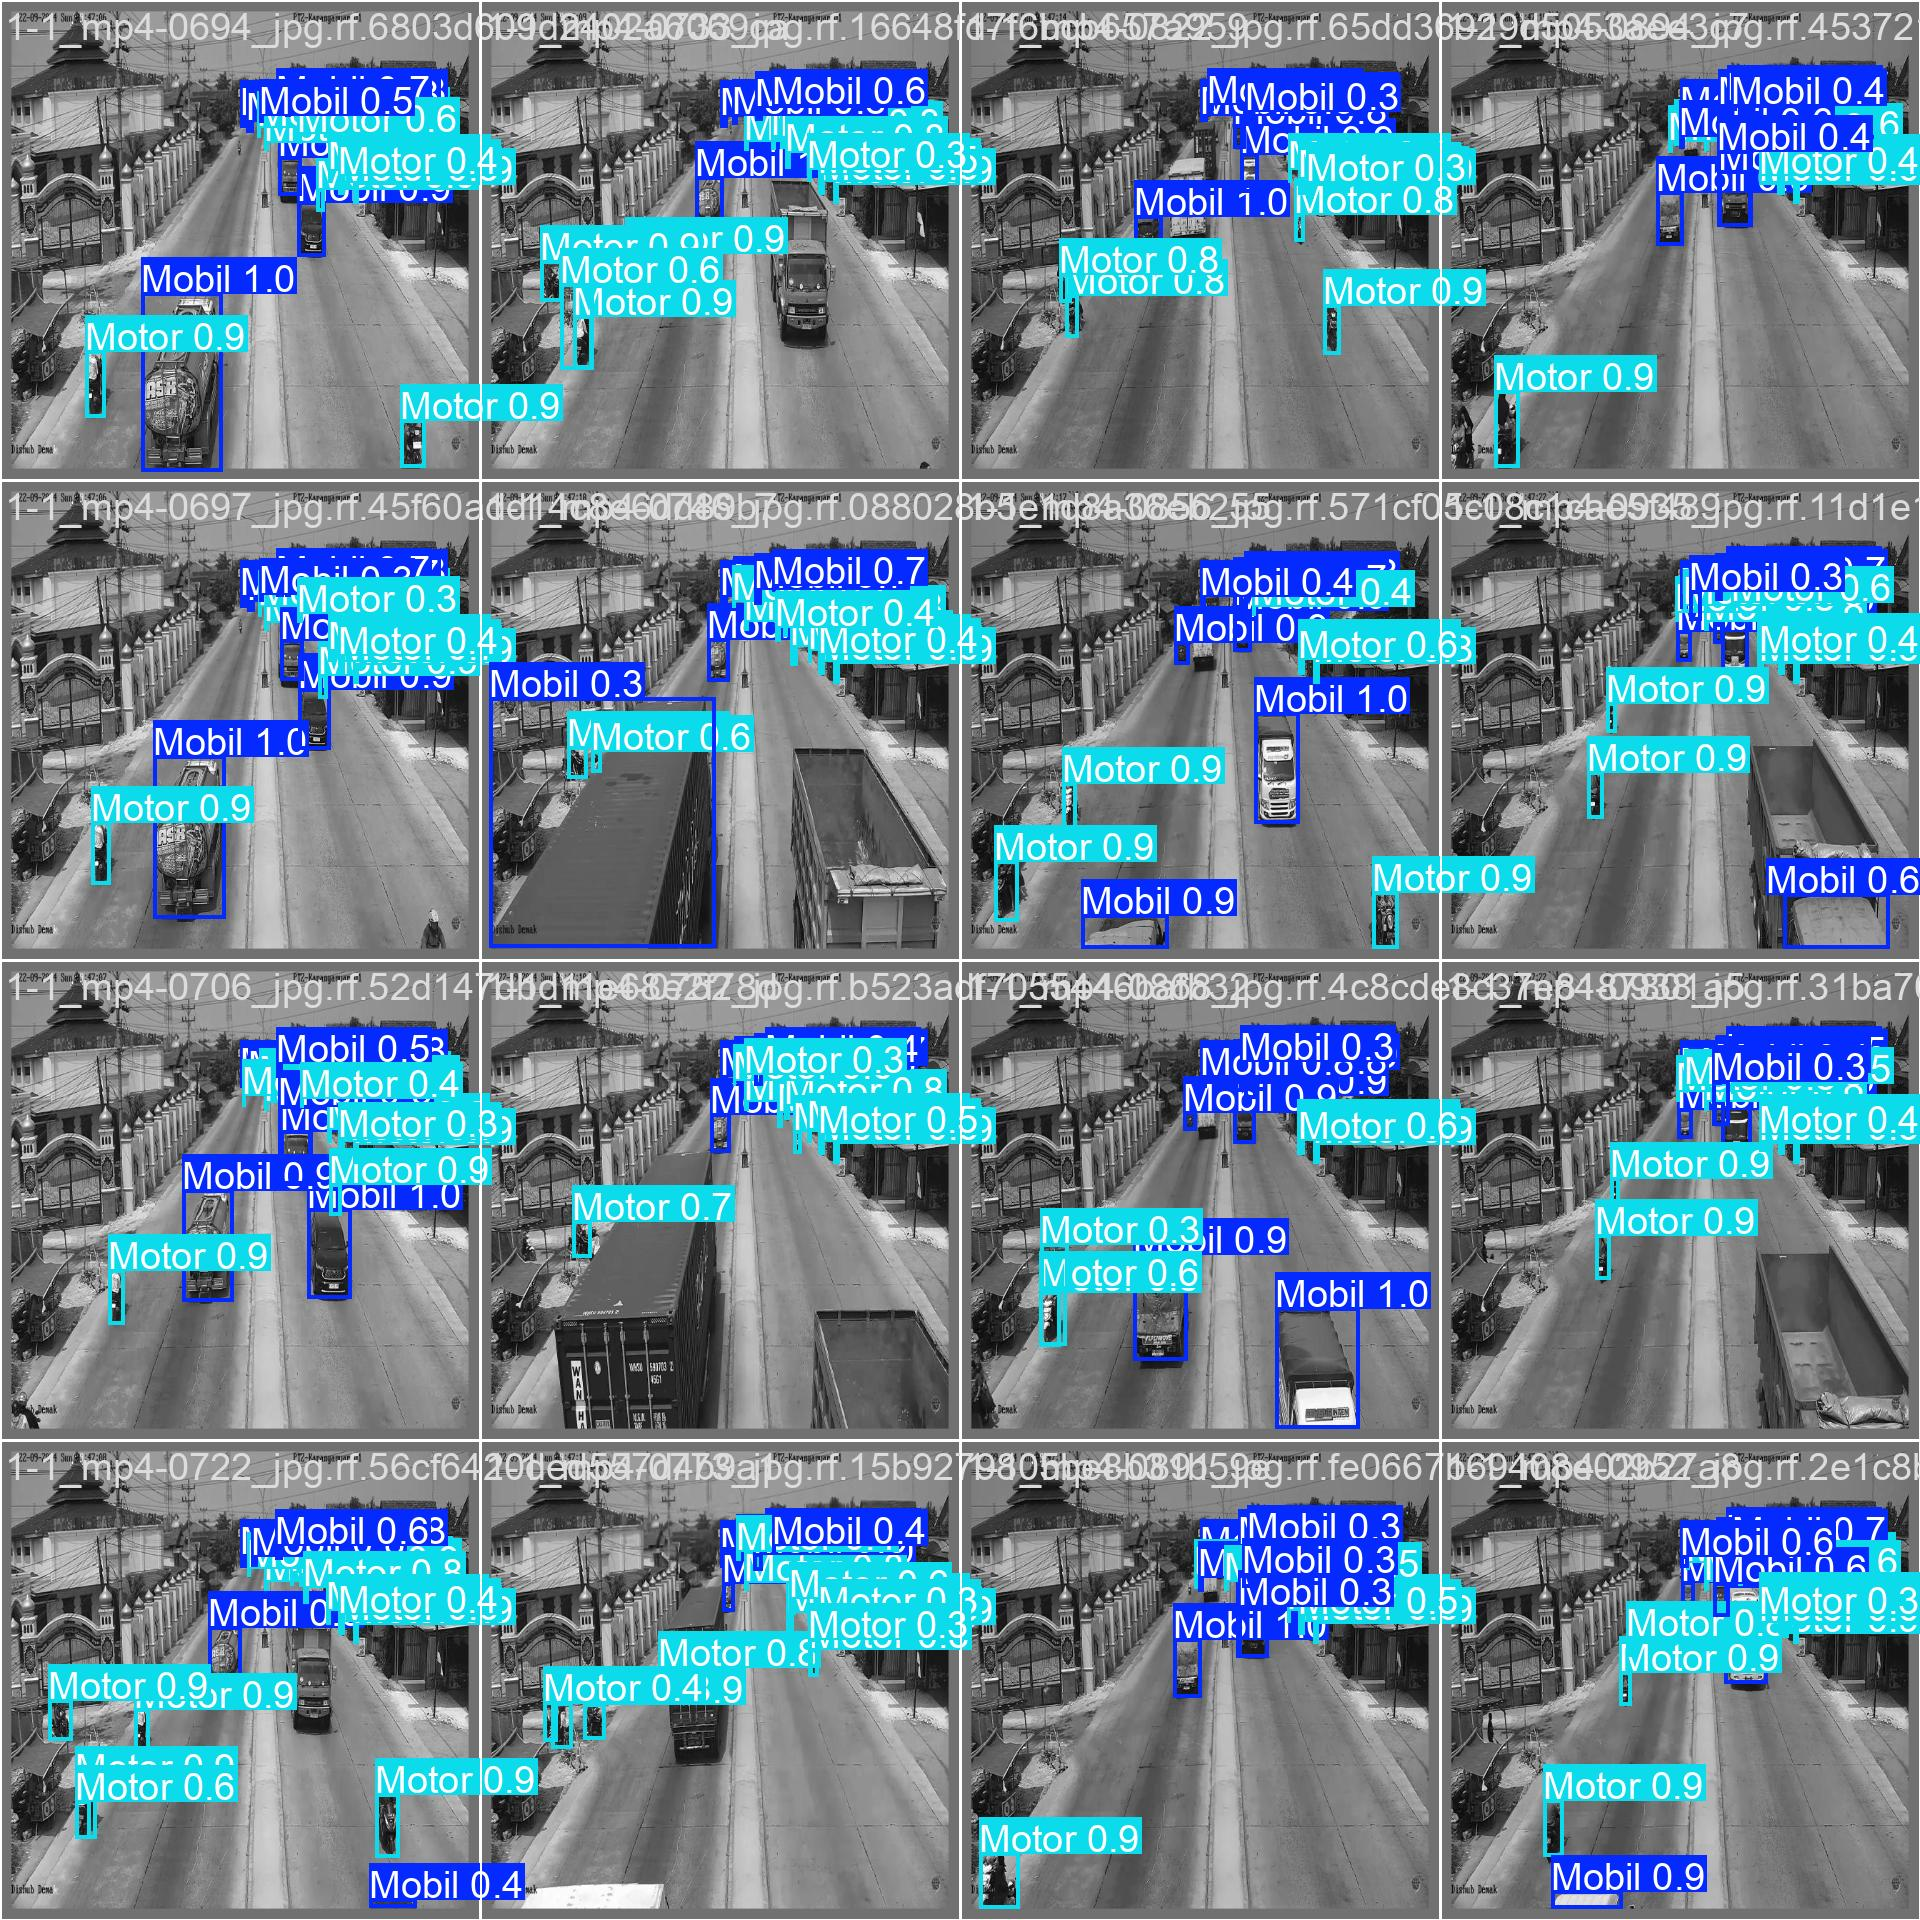

In [21]:
display(Image(filename='/content/runs/detect/train2/val_batch2_pred.jpg'))

In [ ]:
display(Image(filename='/content/runs/detect/train2/results.png'))

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=data.yaml save_json=True

In [22]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt source="/content/Real30FPS.MOV" save=True

Ultralytics YOLOv8.2.101 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/1819) /content/Real30FPS.MOV: 480x640 12 Mobils, 8 Motors, 64.6ms
video 1/1 (frame 2/1819) /content/Real30FPS.MOV: 480x640 11 Mobils, 7 Motors, 13.2ms
video 1/1 (frame 3/1819) /content/Real30FPS.MOV: 480x640 11 Mobils, 8 Motors, 13.1ms
video 1/1 (frame 4/1819) /content/Real30FPS.MOV: 480x640 11 Mobils, 7 Motors, 13.1ms
video 1/1 (frame 5/1819) /content/Real30FPS.MOV: 480x640 12 Mobils, 8 Motors, 13.1ms
video 1/1 (frame 6/1819) /content/Real30FPS.MOV: 480x640 12 Mobils, 11 Motors, 13.1ms
video 1/1 (frame 7/1819) /content/Real30FPS.MOV: 480x640 12 Mobils, 10 Motors, 13.1ms
video 1/1 (frame 8/1819) /content/Real30FPS.MOV: 480x640 15 Mobils, 10 Motors, 13.1ms
video 1/1 (frame 9/1819) /content/Real30FPS.MOV: 480x640 14 Mobils, 9 Motors, 13.1ms
video 1/1 (frame 10/1819) /content/Real30FPS.MOV: 480x640 14

In [25]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt source="/content/Motor4.MOV" save=True

Ultralytics YOLOv8.2.101 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/537) /content/Motor4.MOV: 384x640 1 Motor, 39.1ms
video 1/1 (frame 2/537) /content/Motor4.MOV: 384x640 1 Motor, 10.8ms
video 1/1 (frame 3/537) /content/Motor4.MOV: 384x640 1 Motor, 10.8ms
video 1/1 (frame 4/537) /content/Motor4.MOV: 384x640 1 Motor, 10.7ms
video 1/1 (frame 5/537) /content/Motor4.MOV: 384x640 1 Motor, 10.7ms
video 1/1 (frame 6/537) /content/Motor4.MOV: 384x640 (no detections), 10.7ms
video 1/1 (frame 7/537) /content/Motor4.MOV: 384x640 (no detections), 10.7ms
video 1/1 (frame 8/537) /content/Motor4.MOV: 384x640 1 Motor, 10.7ms
video 1/1 (frame 9/537) /content/Motor4.MOV: 384x640 (no detections), 10.7ms
video 1/1 (frame 10/537) /content/Motor4.MOV: 384x640 (no detections), 11.5ms
video 1/1 (frame 11/537) /content/Motor4.MOV: 384x640 (no detections), 10.7ms
video 1/1 (frame 12/537) /c

In [23]:
from IPython.display import Video

# Display the saved video with predictions
Video("/content/runs/runs/detect/predict/Real30FPS.avi", embed=True)

In [24]:
Video("/content/runs/runs/detect/predict/Real30FPS.avi", embed=True)